# Práctica 0: Python. Integrales por el método de Monte Carlo.
Realizada por:
- Jaime Benedí
- Miguel Sevilla

Dada una función $f(x)$ positiva en el intervalo, donde $x$ pertenece a $[a, b]$ cuyo valor máximo es $M$ dentro de ese intervalo, podemos definir un rectángulo de área $(b-a)\times M$ como el que se muestra en la figura para el intervalo $[0, 2]$. El método de Monte Carlo para el cálculo de la integral consiste en generar aleatoriamente puntos (en rojo en la figura) dentro de ese rectángulo y aproximar el valor de la integral por el porcentaje de puntos que caen por debajo de la función en cuestión:

$$I\simeq \frac{N_{debajo}}{N_{total}}*(b-a)*M$$

Donde $N_{debajo}$ es el número de puntos $(x,y)$ generados aleatoriamente cuya coordenada y es menor que el valor de la función $f(x)$ para ese valor de $x$ y $N_{total}$ es el número de puntos generados aleatoriamente dentro del rectángulo.

Implementa en Python una función con la siguiente cabecera:

```python
def integra_mc(fun, a, b, num_puntos=10000)
```
que calcule la integral de `fun` entre `a` y `b` por el método de Monte Carlo antes descrito, generando para ello num_puntos aleatoriamente. Puedes comprobar la corrección del resultado obtenido comparándolo con aquel tras aplicar la función `scipy.integrate.quad()` de Python.

Se debe implementar dos versiones del algoritmo:
1. Una iterativa que realice num_puntos iteraciones para calcular el resultado
2. Otra que use recursos vectorizados en lugar de bucles

Compara los tiempos de ejecución de ambas implementaciones.

## Recursos usados

In [46]:
# para la generación de arrays en coste menor que lineal y la herramienta de vectorización de funciones
from numpy import linspace, vectorize
# función maximo de Numpy (max vectorizada), nombre cambiado por diferenciar
from numpy import max as numpyMax
# función suma de elementos de un array Numpy (suma vectorizada), nombre cambiado por diferenciar
from numpy import sum as numpySum

# para generar arrays de valores aleatorios
from numpy.random import uniform as unifVector

# para la función objetivo
from scipy.integrate import quad

# para la construcción de gráficas
import matplotlib.pyplot as graph

# para generar un valor aleatorio
from random import uniform

# para procesar el tiempo de ejecución de las funciones
from time import process_time

## Funciones de impresión de las gráficas
Se comentará por encima la implementación de estas funciones, dado que no es el objetivo principal.

In [47]:
def print_func_mc(func, xCrosses, yCrosses, a : float, b : float, num_puntos : int) -> None :
    """Función que genera el gráfico con la función y los puntos generados

    Args:
        func (function): funcion de computo
        xCrosses (array_like): coordenadas x de los puntos
        yCrosses (array_like): coordenadas y de los puntos
        a (float): intervalo mínimo de integral
        b (float): intervalo máximo de integral
        num_puntos (int): número de puntos para la integración de monte carlo
    """
    graph.figure()
    graph.title(label=f"Integral de Monte Carlo para {num_puntos} puntos", loc='center')
    
    # Dibujamos la función
    ordenadas = linspace(a, b, num_puntos)
    graph.plot(ordenadas, vectorize(func)(ordenadas), linestyle='-', linewidth=1.0, color='blue', label='function')
    
    # Dibujamos los dardos como cruces
    graph.scatter(xCrosses, yCrosses, marker='x', c='red', label='darts')

    # Mostramos y cerramos la gráfica
    graph.show()
    graph.close()


## Funciones auxiliares

In [48]:
def launch(funcIntegral, fun, a : float, b : float, num_puntos : int = 10000) -> None:
    """Función que ejecuta el problema así cómo generar la gráfica de la función

    Args:
        funcIntegral (function): función del problema a evaluar
        fun (function): función de cómputo
        a (float): intervalo mínimo de integral
        b (float): intervalo máximo de integral
        num_puntos (int, optional): número de puntos para la integración de monte carlo. Defaults to 10000.
    """
    integral, xs, ys = funcIntegral(fun, a, b, num_puntos)
    
    print(f"Integral por el método de Monte Carlo: {integral:.4f}")
    # Devuelve el valor de la integral y el error estimado en la operación
    print(f"Integral real: {quad(fun, a, b)}")
    
    print_func_mc(fun, xs, ys, a, b, num_puntos)

## 1. Función iterativa

In [49]:
def integra_mc_iter(
        fun,
        a :float, b : float,
        num_puntos : int = 10000
    ) -> tuple[float, list[float], list[float]] :
    """Calcula la integral por el método de monte carlo con programación iterativa.
    Presenta un cálculo elemento a elemento de máximos, mínimos, aleatorios y cómputos

    Args:
        fun (function): Función (real) que devuelve un float
        a (float): mínimo valor del intervalo sobre el que calcular la función
        b (float): máximo valor del intervalo sobre el que calcular la función
        num_puntos (int, optional): Numero de puntos usados para sacar la integral. Defaults to 10000.

    Returns:
        tuple[float, list[float], list[float]]: Devuelve el resultado de la integral, las coordenadas x e y de cada punto
    """
    # Listas donde guardaremos las coordenadas de los puntos
    xs, ys = [], []
    # Numero de puntos por debajo
    dardosDebajo : int = 0
    # Valor maximo y minimo de la función aproximado
    maxAprox : float = float("-inf")
    minAprox : float = float("inf")
    # valor de segmentación de AB para hallar 
    step : float = (b-a) / num_puntos

    # Calculamos el maximo de la función de manera aproximada y respecto al intervalo de estudio
    for i in range(num_puntos):
        maxAprox = max(maxAprox, fun(a + step*i))
        minAprox = min(minAprox, fun(a + step*i))

    # Generamos y situamos los puntos
    for i in range(num_puntos) :
        x, y = uniform(a, b), uniform(minAprox, maxAprox)

        # Si el dardo está debajo, pertenece al área a calcular de la función
        if (fun(x) >= y) :
            dardosDebajo += 1

        # operacion de concatenado de listas
        xs += [x]
        ys += [y]

    # Calculo de la integral
    integral : float = (dardosDebajo / num_puntos) * (b - a) * maxAprox

    return integral, xs, ys

## 2. Función vectorizada

In [50]:
def integra_mc_vect(
        fun,
        a: float, b: float,
        num_puntos : int = 10000
    ):
    """Calcula la integral por el método de monte carlo con programación vectorial.

    Args:
        fun (function): Función (real) que devuelve un float
        a (float): mínimo valor del intervalo sobre el que calcular la función
        b (float): máximo valor del intervalo sobre el que calcular la función
        num_puntos (int, optional): Numero de puntos usados para sacar la integral. Defaults to 10000.

    Returns:
        tuple[float, list[float], list[float]]: Devuelve el resultado de la integral, las coordenadas x de cada punto y las y
    """
    # Vectorizamos la función que le pasamos (por si no lo está ya)
    vFunc = vectorize(fun)
    
    # Hayamos el máximo aproximado de la función
    maxAprox = numpyMax(vFunc(linspace(a,b,10000)))

    # Hayamos las coordenadas de los puntos
    dardosX, dardosY = unifVector(a, b, num_puntos), unifVector(0, maxAprox, num_puntos)

    # Devolvemos la integral y las coordenadas
    return (numpySum(dardosY <= vFunc(dardosX)) / num_puntos) * (b - a) * maxAprox, dardosX, dardosY

## Pruebas de las funciones

In [51]:
# Exponencial cuadrática
fun = (lambda x: x**2)
mini = 0
maxi = 3.0
numPuntos = 10000

Integral por el método de Monte Carlo: 8.9406
Integral real: (9.000000000000002, 9.992007221626411e-14)


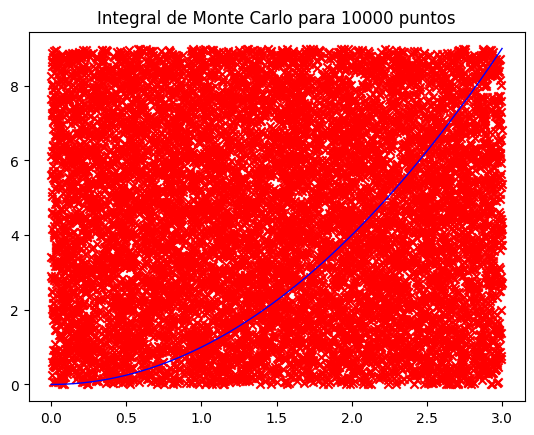

In [52]:
launch(integra_mc_iter, fun, mini, maxi, numPuntos)

Integral por el método de Monte Carlo: 9.0126
Integral real: (9.000000000000002, 9.992007221626411e-14)


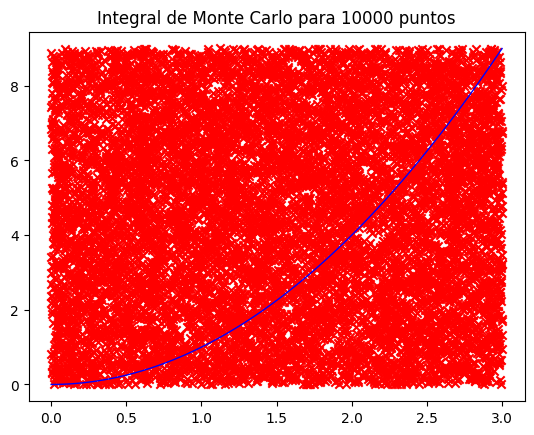

In [53]:
launch(integra_mc_vect, fun, mini, maxi, numPuntos)

## Comparativa entre versiones iterativa y vectorizada

In [54]:
def functions_execution_time_comparator(
        funV, funI,
        computeFunction,
        a: float, b: float,
        minPopulation: int = 100,
        maxPopulation : int = 100000,
        numPopulations : int = 20
    )-> None:
    """Evalua dos funciones que realizan el mismo cómputo de una integral, pero implementadas de distinta
    forma: una vectorizada y otra iterativa. Calcula los tiempos de ejecución y los muestra en una gráfica. La
    comparativa se hace respecto a los mismos parámetros: mismo número de puntos, mismo intervalo y misma función

    Args:
        funV (function): función de procesado vectorizada
        funI (function): función de procesado iterativa
        computeFunction (function): función de cómputo que devuelve float_like
        a (float): mínimo del intervalo a integrar sobre computeFunction
        b (float): máximo del intervalo a integrar sobre computeFunction
        minPopulation (int, optional): tamaño mínimo de puntos a evaluar. Defaults to 100.
        maxPopulation (int, optional): tamaño máximo de puntos a evaluar. Defaults to 100000.
        numPopulations (int, optional): número total de poblaciones de puntos a evaluar. Defaults to 20.
    """
    sizes = linspace(minPopulation, maxPopulation, numPopulations, dtype=int)

    timesV, timesI = [], []

    for size in sizes:
        # ejecutamos la función vectorizada y medimos su tiempo
        tic = process_time()
        funV(computeFunction, a, b, size)
        timesV += [1000 * (process_time() - tic)]

        # ejecutamos la función iterativa y medimos su tiempo
        tic = process_time()
        funI(computeFunction, a, b, size)
        timesI += [1000 * (process_time() - tic)]

    # Construcción del grafo
    graph.figure()
    graph.title("Tiempos de ejecución entre funciones", loc='center')
    graph.scatter(sizes, timesI, c='red', label='bucle')
    graph.scatter(sizes, timesV, c='blue', label='vector')
    graph.xlabel("Tamaño de población", loc='center')
    graph.ylabel("Tiempo (s)", loc='center')
    graph.legend()
    graph.show()
    graph.close()

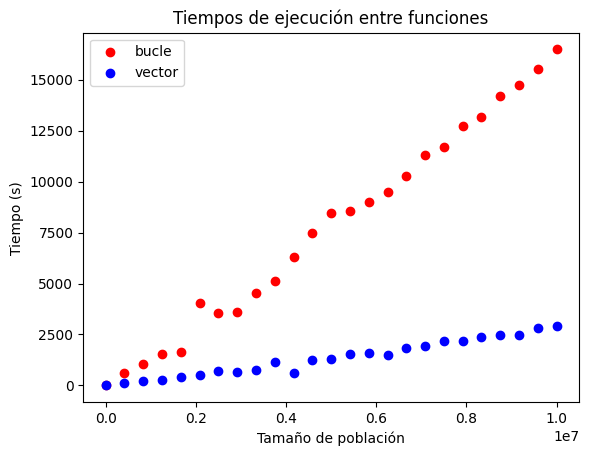

In [55]:
func = (lambda x: x**2)
a = 0.0
b = 3.0
minSize = 10
maxSize = 10000000
numIters = 25
functions_execution_time_comparator(integra_mc_vect, integra_mc_iter, func, a, b, minSize, maxSize, numIters)

## Análisis
Como observamos, la diferencia de tiempos para una entra de datos suficientemente grande es abismal. La versión interativas tiene complejidad temporal algo más a lineal, mientras que la versión vectorizada tiene una complejidad más cercana a la logarítmica.

La esta capacidad de vectorización está asociada a características modernas de los procesadores sobre procesamiento y operaciones de arrays, vectores y matrices. Ambas versiones acceden al mismo número de elementos, pero las operaciones vectorizadas explotan las capacidades de los procesadores para realizar accesos menos costosos al TAD así como expandir operaciones entre los elementos del TAD o entre TADs en posiciones determinadas de manera mucho más eficiente. A pesar de la importancia de un código eficiente, esta herramienta además nos permite reducir un poco el tiempo de ejecución para las grandes cantidades de datos que se esperan que usemos.

Podemos observar este patrón con más funciones

In [56]:
from math import pi, sin, log, cbrt
cuadratica = ((lambda x : x**2), 0.0, 3.0)
seno = (sin, 0.0, pi)
logaritmo = (log, 1.0, 4.0)
raizCuadrada = (cbrt, 0.0, 4.0)
nlogn = ((lambda x: x * log(x)), 1.0, 4.0)

funciones = [cuadratica, seno, logaritmo, raizCuadrada, nlogn]

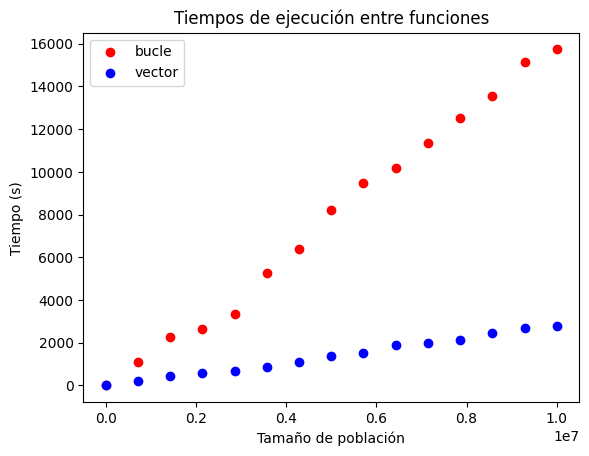

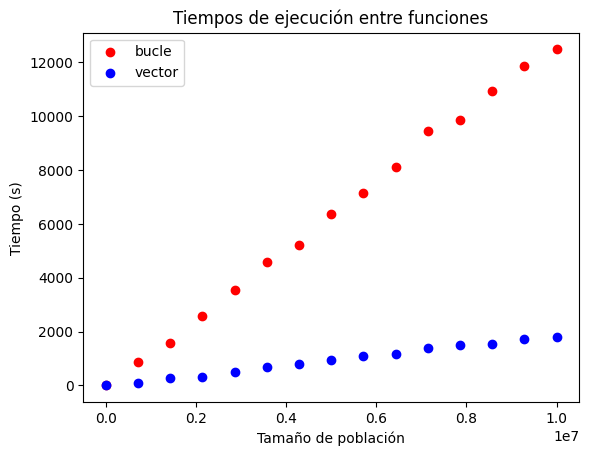

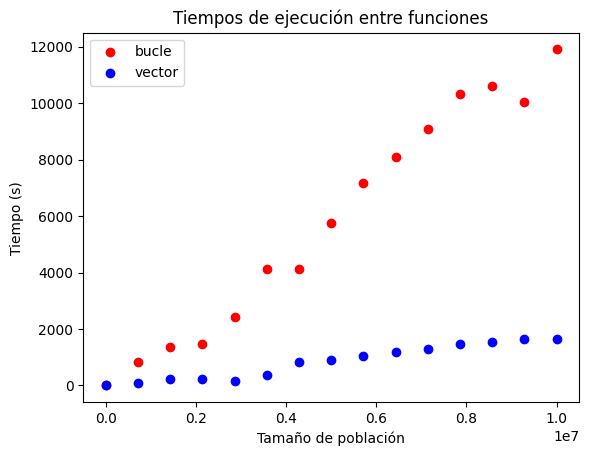

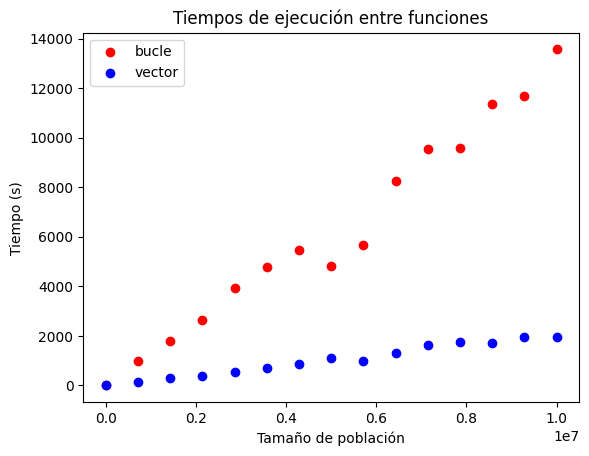

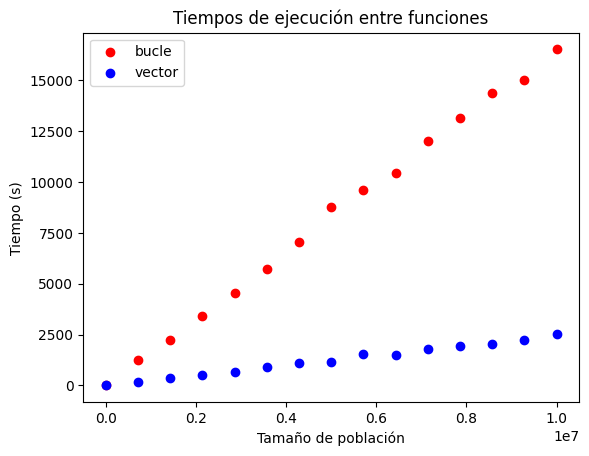

In [57]:
minSize = 10
maxSize = 10000000
numIters = 15

for (fun, a, b) in funciones :
    functions_execution_time_comparator(integra_mc_vect, integra_mc_iter, fun, a, b, minSize, maxSize, numIters)